In [1]:
print("테스트")

테스트


# Data Load

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("d:/Python/data/titanic/train.csv", index_col = "PassengerId")
test = pd.read_csv("d:/Python/data/titanic/test.csv", index_col = "PassengerId")

print(train.shape, test.shape)

(891, 11) (418, 10)


In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

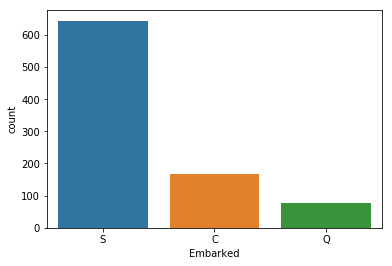

In [4]:
sns.countplot(train["Embarked"])

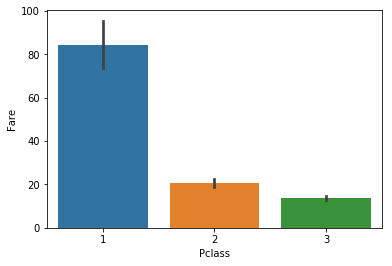

In [5]:
sns.barplot(data = train, x = "Pclass", y = "Fare")

In [8]:
# Embarked 2개 --> S로
train["Embarked_fill"] = train["Embarked"]
train.loc[train["Embarked"].isnull(), "Embarked_fill"] = "S"
train.loc[train["Embarked_fill"].isnull()]

# Fare NaN 1개 --> Pclass 3이라서, 3의 평균 Fare로 처리
train["Fare_fill"] = train["Fare"]
train.loc[train["Fare"].isnull(), "Fare_fill"] = np.array(train.loc[train["Pclass"] == 3].mean())[1]
train.loc[train["Fare_fill"].isnull()]

train["Familysize"] = train["Parch"] + train["SibSp"]
test["Familysize"] = test["Parch"] + test["SibSp"]

# train["Name_encode"] = train["Name"]
train.loc[train["Name"].str.contains("Master"), "Name_encode"] = "Master"
train.loc[train["Name"].str.contains("Miss"), "Name_encode"] = "Miss"
train.loc[train["Name"].str.contains("Mr"), "Name_encode"] = "Mr"
train.loc[train["Name"].str.contains("Mrs"), "Name_encode"] = "Mrs"
train.loc[train["Name"].str.contains("Ms"), "Name_encode"] = "Mrs"
train.loc[train["Name_encode"].isnull()].head()

train.loc[((train["Sex"] == "female") & (train["Name_encode"].isnull())), "Name_encode"] = "Miss"
train.loc[((train["Sex"] == "male") & (train["Name_encode"].isnull())), "Name_encode"] = "Mr"

#train[["Name", "Name_encode"]].head(20)
train.loc[train["Name_encode"].isnull()]

train["Age_encode"] = train["Age"]
train.loc[train["Age"].isnull(), "Age_encode"] = train["Age"].mean()
train.loc[train["Age_encode"].isnull()]

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        # concat으로 DF끼리 합치기, axis =1 으로 열끼리 합치기, 기본은 행끼리
        # pd.get_dummies는 원핫인코딩해주는 pandas 함수, 칼럼과 공통어를 지정해주면 됨.
        #data = data.drop(column, axis = 1) #axis = 1이 없으면, 해당 이름의 행을 삭제함
    return data

dummy_columns = ["Sex", "Embarked_fill", "Name_encode", "Pclass"]

train_dummy = dummy_data(train, dummy_columns)

train = train_dummy

print(train.shape)
train.head()

(891, 28)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_fill_C,Embarked_fill_Q,Embarked_fill_S,Name_encode_Master,Name_encode_Miss,Name_encode_Mr,Name_encode_Mrs,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1,0,0,1,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,1,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,1,0,1,0,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,1,0,0,0,1,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,1,0,0,1,0,0,0,1


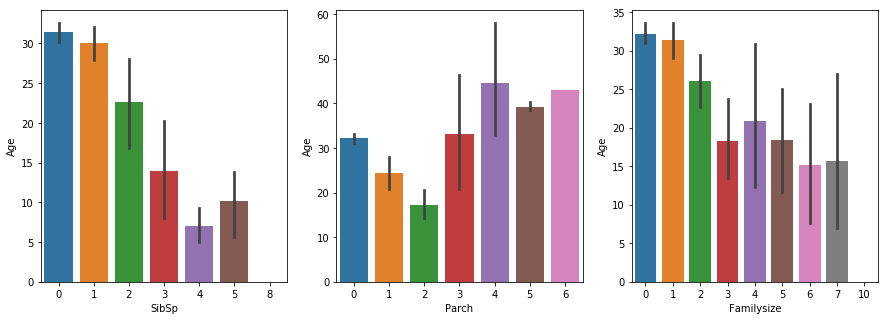

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3) 
#fig 또는 figure라고 해도 됨. plt.subplot. cols가 아니라 ncols
fig.set_size_inches(15, 5)

sns.barplot(data = train, x = "SibSp", y = "Age", ax = ax1)
sns.barplot(data = train, x = "Parch", y = "Age", ax = ax2)
sns.barplot(data = train, x = "Familysize", y = "Age", ax = ax3)

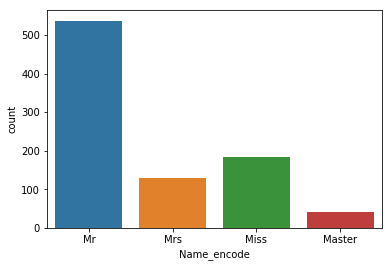

In [10]:
sns.countplot(train["Name_encode"]) #NaN값은 비워두고 안보여줌

In [11]:
# Embarked 2개 --> S로
test["Embarked_fill"] = test["Embarked"]
test.loc[test["Embarked"].isnull(), "Embarked_fill"] = "S"
test.loc[test["Embarked_fill"].isnull()]

# Fare NaN 1개 --> Pclass 3이라서, 3의 평균 Fare로 처리
test["Fare_fill"] = test["Fare"]
test.loc[test["Fare"].isnull(), "Fare_fill"] = np.array(test.loc[test["Pclass"] == 3].mean())[1]
test.loc[test["Fare_fill"].isnull()]

# test["Name_encode"] = test["Name"]
test.loc[test["Name"].str.contains("Master"), "Name_encode"] = "Master"
test.loc[test["Name"].str.contains("Miss"), "Name_encode"] = "Miss"
test.loc[test["Name"].str.contains("Mr"), "Name_encode"] = "Mr"
test.loc[test["Name"].str.contains("Mrs"), "Name_encode"] = "Mrs"
test.loc[test["Name"].str.contains("Ms"), "Name_encode"] = "Mrs"
test.loc[test["Name_encode"].isnull()].head()

test.loc[((test["Sex"] == "female") & (test["Name_encode"].isnull())), "Name_encode"] = "Miss"
test.loc[((test["Sex"] == "male") & (test["Name_encode"].isnull())), "Name_encode"] = "Mr"

#test[["Name", "Name_encode"]].head(20)
test.loc[test["Name_encode"].isnull()]

test["Age_encode"] = test["Age"]
test.loc[test["Age"].isnull(), "Age_encode"] = test["Age"].mean()
test.loc[test["Age_encode"].isnull()]

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        # concat으로 DF끼리 합치기, axis =1 으로 열끼리 합치기, 기본은 행끼리
        # pd.get_dummies는 원핫인코딩해주는 pandas 함수, 칼럼과 공통어를 지정해주면 됨.
        #data = data.drop(column, axis = 1) #axis = 1이 없으면, 해당 이름의 행을 삭제함
    return data

dummy_columns = ["Sex", "Embarked_fill", "Name_encode", "Pclass"]

test_dummy = dummy_data(test, dummy_columns)

test = test_dummy

print(test.shape)
test.head()

(418, 27)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Embarked_fill_C,Embarked_fill_Q,Embarked_fill_S,Name_encode_Master,Name_encode_Miss,Name_encode_Mr,Name_encode_Mrs,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,0,1,0,0,0,1,0,0,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,0,0,1,0,0,0,1,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,0,1,0,0,0,1,0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,0,0,1,0,0,1,0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,0,0,1,0,0,0,1,0,0,1


In [12]:
feature_names = ['Parch', 'Fare_fill',
       'Familysize', 'Embarked_fill_C', 'Embarked_fill_S',
       'Name_encode_Mr', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_encode']

# RF 0.8094 Kaggle 0.75598
# XGB 0.8328 kaggle 0.79904 (1587위)
# feature importance가 0인 변수 제외 
# (Name_encode_Master,Name_encode_Miss, Name_encode_Mrs, Sex_female, SibSp)

feature_names2 = ['Parch', 'SibSp', 'Fare_fill',
       'Familysize', 'Sex_female',
       'Embarked_fill_C', 'Embarked_fill_S',
       'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_encode']

# RF 0.8094 Kaggle 0.75598
# XGB 0.8328 kaggle 0.79904 (1587위)

feature_names1 = ['Parch', 'SibSp', 'Fare_fill',
       'Familysize', 'Sex_female', 'Sex_male',
       'Embarked_fill_C', 'Embarked_fill_Q', 'Embarked_fill_S',
       'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_encode']

label_name = 'Survived'

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Parch              891 non-null int64
Fare_fill          891 non-null float64
Familysize         891 non-null int64
Embarked_fill_C    891 non-null uint8
Embarked_fill_S    891 non-null uint8
Name_encode_Mr     891 non-null uint8
Pclass_1           891 non-null uint8
Pclass_2           891 non-null uint8
Pclass_3           891 non-null uint8
Age_encode         891 non-null float64
dtypes: float64(2), int64(2), uint8(6)
memory usage: 80.0 KB


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Parch              418 non-null int64
Fare_fill          418 non-null float64
Familysize         418 non-null int64
Embarked_fill_C    418 non-null uint8
Embarked_fill_S    418 non-null uint8
Name_encode_Mr     418 non-null uint8
Pclass_1           418 non-null uint8
Pclass_2           418 non-null uint8
Pclass_3           418 non-null uint8
Age_encode         418 non-null float64
dtypes: float64(2), int64(2), uint8(6)
memory usage: 18.8 KB


# Model Load

In [17]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [18]:
model_rf = RandomForestClassifier(random_state = 79, n_jobs = -1)
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=79, verbose=0, warm_start=False)

In [19]:
model_xgb = XGBClassifier(random_state = 79, n_jobs = -1)
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=79, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

# GridSearch & RandomizedSearch

In [20]:
# GridSearch 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {'n_estimators' : [500, 700, 900], # 700이상은 0.84로 동일
             'learning_rate' : [0.001, 0.05, 0.01, 0.1], # 0.001이 0.84로 가장 높았음
             'random_state' : [79],
             'n_jobs' : [-1]}

grid = GridSearchCV(model_xgb, param_grid = param_grid, cv = 5)
%time grid.fit(X_train, y_train)

Wall time: 33.6 s


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=79, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500, 700, 900], 'learning_rate': [0.001, 0.05, 0.01, 0.1], 'random_state': [79], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.392022,0.015285,0.0028,0.000400,0.001,500,-1,79,"{'learning_rate': 0.001, 'n_estimators': 500, ...",0.843575,...,0.832772,0.018887,7,0.837079,0.846910,0.837307,0.855540,0.827731,0.840913,0.009501
1,0.548631,0.015933,0.0034,0.000800,0.001,700,-1,79,"{'learning_rate': 0.001, 'n_estimators': 700, ...",0.849162,...,0.836139,0.018288,4,0.839888,0.852528,0.838710,0.855540,0.827731,0.842879,0.010092
2,0.708440,0.017443,0.0040,0.001095,0.001,900,-1,79,"{'learning_rate': 0.001, 'n_estimators': 900, ...",0.849162,...,0.836139,0.018288,4,0.839888,0.852528,0.838710,0.855540,0.827731,0.842879,0.010092
3,0.376822,0.016056,0.0036,0.001357,0.05,500,-1,79,"{'learning_rate': 0.05, 'n_estimators': 500, '...",0.821229,...,0.840629,0.022565,1,0.921348,0.922753,0.904628,0.918654,0.906162,0.914709,0.007733
4,0.515629,0.010764,0.0042,0.000748,0.05,700,-1,79,"{'learning_rate': 0.05, 'n_estimators': 700, '...",0.826816,...,0.840629,0.024528,1,0.933989,0.932584,0.918654,0.929874,0.920168,0.927054,0.006397


In [22]:
scores = np.array(grid_df.mean_test_score).reshape(4, 3)

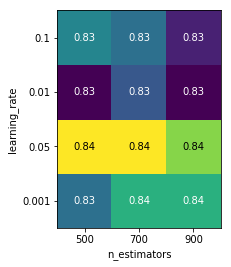

In [23]:
import mglearn

mglearn.tools.heatmap(scores, xlabel = 'n_estimators', xticklabels = param_grid['n_estimators'],
                     ylabel = 'learning_rate', yticklabels = param_grid['learning_rate'], cmap = 'viridis')

In [24]:
# print(grid.cv_results_)
print(f"best score: {grid.best_score_ : .4f}")
print(f"best param: {grid.best_params_}")

best score:  0.8406
best param: {'learning_rate': 0.05, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 79}


In [25]:
# RandomizedSearch

import scipy.stats as st

params = {'n_estimators' : st.randint(700, 750),
          'learning_rate' : st.uniform(0.003, 0.002),
             'random_state' : [79],
             'n_jobs' : [-1]
}

gs = RandomizedSearchCV(model_xgb, params, cv = 5, n_iter=10) 
# 기본값 cv없음, n_iter = 10
%time gs.fit(X_train, y_train)

#print(gs.cv_results_)
print(f"best score: {gs.best_score_ : .4f}")
print(f"best param: {gs.best_params_}")

Wall time: 30.4 s
best score:  0.8339
best param: {'learning_rate': 0.003635334024408808, 'n_estimators': 705, 'n_jobs': -1, 'random_state': 79}


In [26]:
grid_df = pd.DataFrame(gs.cv_results_)
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.684839,0.176667,0.0028,3.999233e-04,0.00363533,705,-1,79,"{'learning_rate': 0.003635334024408808, 'n_est...",0.837989,...,0.833895,0.017206,1,0.841292,0.848315,0.844320,0.856942,0.831933,0.844560,0.008217
1,0.570433,0.007839,0.0028,4.001379e-04,0.00316664,730,-1,79,"{'learning_rate': 0.0031666422955995486, 'n_es...",0.837989,...,0.833895,0.017206,1,0.841292,0.852528,0.844320,0.855540,0.830532,0.844842,0.008845
2,0.569432,0.008065,0.0030,1.507891e-07,0.00391169,736,-1,79,"{'learning_rate': 0.0039116868593460224, 'n_es...",0.832402,...,0.832772,0.017084,4,0.841292,0.848315,0.845722,0.858345,0.831933,0.845121,0.008649
3,0.548831,0.009131,0.0034,4.899598e-04,0.00326987,718,-1,79,"{'learning_rate': 0.00326987056491352, 'n_esti...",0.837989,...,0.833895,0.017206,1,0.841292,0.848315,0.844320,0.855540,0.830532,0.844000,0.008254
4,0.542831,0.003188,0.0032,3.999710e-04,0.00422079,713,-1,79,"{'learning_rate': 0.00422078661853162, 'n_esti...",0.837989,...,0.832772,0.015252,4,0.848315,0.848315,0.845722,0.859748,0.841737,0.848767,0.005995
5,0.605435,0.051735,0.0030,0.000000e+00,0.00497442,724,-1,79,"{'learning_rate': 0.004974420326509936, 'n_est...",0.832402,...,0.829405,0.014524,9,0.858146,0.848315,0.845722,0.868163,0.850140,0.854097,0.008167
6,0.629636,0.041843,0.0038,7.483282e-04,0.00401053,740,-1,79,"{'learning_rate': 0.0040105268896387936, 'n_es...",0.832402,...,0.831650,0.015031,8,0.842697,0.848315,0.845722,0.859748,0.841737,0.847644,0.006481
7,0.606035,0.029423,0.0042,7.483155e-04,0.00476,731,-1,79,"{'learning_rate': 0.0047599997418025205, 'n_es...",0.826816,...,0.829405,0.013076,9,0.858146,0.848315,0.845722,0.861150,0.850140,0.852695,0.005925
8,0.539431,0.009003,0.0030,1.168008e-07,0.00407841,702,-1,79,"{'learning_rate': 0.004078406971428907, 'n_est...",0.832402,...,0.832772,0.017084,4,0.839888,0.848315,0.845722,0.858345,0.831933,0.844840,0.008790
9,0.543231,0.006014,0.0032,4.000902e-04,0.00396169,712,-1,79,"{'learning_rate': 0.003961687294602244, 'n_est...",0.832402,...,0.832772,0.017084,4,0.839888,0.848315,0.845722,0.858345,0.831933,0.844840,0.008790


In [27]:
scores = np.array(grid_df.mean_test_score).reshape(10, 1)

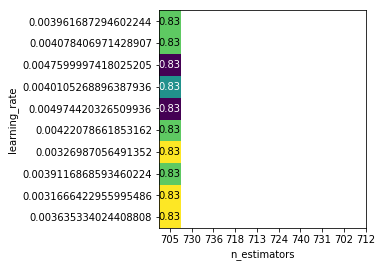

In [28]:
mglearn.tools.heatmap(scores, xlabel = 'n_estimators', xticklabels = grid_df['param_n_estimators'],
                     ylabel = 'learning_rate', yticklabels = grid_df['param_learning_rate'], cmap = 'viridis')

# Model Fit

In [29]:
model_rf = RandomForestClassifier(n_estimators = 4000, random_state = 79, n_jobs = -1)
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4000, n_jobs=-1,
            oob_score=False, random_state=79, verbose=0, warm_start=False)

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
model_rf.fit(X_train, y_train)
%time score_rf = cross_val_score(model_rf, X_train, y_train, cv = 10)

#print(f"{np.round(scores_age, 2)} \n {scores_age.mean(): .2f}")
print(f"RF점수: {np.round(score_rf, 2)} \nRF평균: {score_rf.mean(): .4f}")

Wall time: 1min 47s
RF점수: [0.73 0.83 0.76 0.83 0.88 0.84 0.82 0.74 0.8  0.86] 
RF평균:  0.8104


In [32]:
score_rf = score_rf.mean()

# Model Selection - XGB

In [33]:
model_xgb = XGBClassifier(learning_rate=0.002025398988117261, n_estimators=715, 
                          random_state = 79, n_jobs = -1)
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.002025398988117261,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=715, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=79, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [34]:
import warnings
warnings.filterwarnings('ignore')

model_xgb.fit(X_train, y_train)
%time score_xgb = cross_val_score(model_xgb, X_train, y_train, cv = 10)

#print(f"{np.round(scores_age, 2)} \n {scores_age.mean(): .2f}")
print(f"RF점수: {np.round(score_xgb, 2)} \nRF평균: {score_xgb.mean(): .4f}")

Wall time: 6.02 s
RF점수: [0.83 0.83 0.79 0.87 0.85 0.81 0.82 0.79 0.89 0.85] 
RF평균:  0.8328


In [35]:
score_xgb = score_xgb.mean()

# Feature Importance - RF

In [36]:
print(list(zip(feature_names, model_rf.feature_importances_)))
feature_df = list(zip(feature_names, model_rf.feature_importances_))
feature_df = pd.DataFrame(feature_df)
feature_df.columns = feature_df.columns.astype(str)
feature_df.columns = ["feature", "importance"]
feature_df.sort_values(by=['importance', 'feature'], ascending=[False, True], inplace=True)
feature_df

[('Parch', 0.02382229945363359), ('Fare_fill', 0.2530937556622707), ('Familysize', 0.07047922870099436), ('Embarked_fill_C', 0.012835754965570283), ('Embarked_fill_S', 0.017262852885889593), ('Name_encode_Mr', 0.2875738667081188), ('Pclass_1', 0.02912339980670155), ('Pclass_2', 0.01470568552458765), ('Pclass_3', 0.05581916419055403), ('Age_encode', 0.2352839921016798)]


,feature,importance
5,Name_encode_Mr,0.287574
1,Fare_fill,0.253094
9,Age_encode,0.235284
2,Familysize,0.070479
8,Pclass_3,0.055819
6,Pclass_1,0.029123
0,Parch,0.023822
4,Embarked_fill_S,0.017263
7,Pclass_2,0.014706
3,Embarked_fill_C,0.012836


# Feature Importance - XGB

In [37]:
print(list(zip(feature_names, model_xgb.feature_importances_)))
feature_df = list(zip(feature_names, model_xgb.feature_importances_))
feature_df = pd.DataFrame(feature_df)
feature_df.columns = feature_df.columns.astype(str)
feature_df.columns = ["feature", "importance"]
feature_df.sort_values(by=['importance', 'feature'], ascending=[False, True], inplace=True)
feature_df

[('Parch', 0.0046214787), ('Fare_fill', 0.3474912), ('Familysize', 0.09441021), ('Embarked_fill_C', 0.043573942), ('Embarked_fill_S', 0.017385563), ('Name_encode_Mr', 0.15735035), ('Pclass_1', 0.043353874), ('Pclass_2', 0.048855633), ('Pclass_3', 0.15735035), ('Age_encode', 0.085607395)]


,feature,importance
1,Fare_fill,0.347491
5,Name_encode_Mr,0.157350
8,Pclass_3,0.157350
2,Familysize,0.094410
9,Age_encode,0.085607
7,Pclass_2,0.048856
3,Embarked_fill_C,0.043574
6,Pclass_1,0.043354
4,Embarked_fill_S,0.017386
0,Parch,0.004621


# Predict & Submit

In [38]:
import datetime
today_titanic = datetime.datetime.today().strftime("%y%m%d")

In [39]:
predictions_rf = model_rf.predict(X_test)
submission_rf = pd.read_csv("d:/Python/data/titanic/gender_submission.csv")

submission_rf["Survived"] = predictions_rf

print(submission_rf.shape)
submission_rf.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [22]:
submission_rf.to_csv(f"d:/Python/data/titanic/submission_titanic_RF_{score_rf:.4f}_{today_titanic}.csv", index=False)

In [40]:
predictions_xgb = model_xgb.predict(X_test)
submission_xgb = pd.read_csv("d:/Python/data/titanic/gender_submission.csv")

submission_xgb["Survived"] = predictions_xgb

print(submission_xgb.shape)
submission_xgb.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [32]:
submission_xgb.to_csv(f"d:/Python/data/titanic/submission_titanic_XGB_{score_xgb:.4f}_{today_titanic}.csv", index=False)